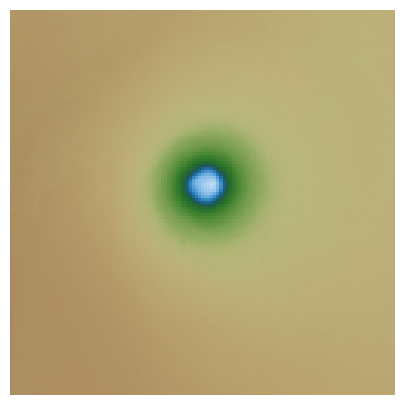

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)

###### get data value: x and y are locaion on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)
def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

###########main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF2.json')

##### 'img' is used to store the final image
img = np.zeros([125, 125, 3])

def insertion(i1, v1, i2, v2, idx):
    return (i1 - idx) / (i1 - i2) * (v2 - v1) + v1

####### implment you direct volume rendering here and store the final image in "img"
def opacityTransfer(val):
    for i in range(1, len(opacityTransferFunc)):
        if opacityTransferFunc[i][0] >= val:
            return insertion(opacityTransferFunc[i - 1][0], opacityTransferFunc[i - 1][1], opacityTransferFunc[i][0], opacityTransferFunc[i][1], val)

def colorTransfer(val):
    for i in range(1, len(colorTransferFunc)):
        if colorTransferFunc[i][0] >= val:
            r = insertion(colorTransferFunc[i - 1][0], colorTransferFunc[i - 1][1], colorTransferFunc[i][0], colorTransferFunc[i][1], val)
            g = insertion(colorTransferFunc[i - 1][0], colorTransferFunc[i - 1][2], colorTransferFunc[i][0], colorTransferFunc[i][2], val)
            b = insertion(colorTransferFunc[i - 1][0], colorTransferFunc[i - 1][3], colorTransferFunc[i][0], colorTransferFunc[i][3], val)
            return [r, g, b]

def rendering(x, y):
    r = 0
    g = 0
    b = 0
    for i in range(49, -1, -1):
        opacity = opacityTransfer(getValue(x, y, i))
        color = colorTransfer(getValue(x, y, i))
        # print(getValue(x, y, i), opacity, color)
        r = r * (1 - opacity) + color[0] * opacity
        g = g * (1 - opacity) + color[1] * opacity
        b = b * (1 - opacity) + color[2] * opacity
    return [r, g, b]

for i in range(125):
    for j in range(125):
        img[i][j] = rendering(i, j)


####### show final image (img)
plt.imshow(img)
plt.show()